In [117]:
# Import modules
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [118]:
# 변수 정의
x = sp.symbols('x', real=True)

# 목적 함수 f(x) 정의 (sin을 sympy에서 가져옴)
f = sp.sin(3*x) + 0.1*x**2

# Gradient와 Hessian 계산 (문제 수정)
grad = sp.diff(f, x)  # 1차 미분 (스칼라)
hess = sp.diff(grad, x)  # 2차 미분 (스칼라)

print("f =", f)
print("∇f =", grad)
print("Hessian =", hess)

f = 0.1*x**2 + sin(3*x)
∇f = 0.2*x + 3*cos(3*x)
Hessian = 0.2 - 9*sin(3*x)


In [119]:
# Convert SymPy object into NumPy object

f_fn    = sp.lambdify((x), f, "numpy")
grad_fn = sp.lambdify((x), grad, "numpy")

In [120]:
# Gradient descent, AdaGrad, RMSProp, Adam 예제 (문제 수정)

theta_gd      = np.array([5.0])   # GD 초기값
theta_adagrad = np.array([5.0])   # AdaGrad 초기값
theta_rmsprop = np.array([5.0])   # RMSProp 초기값
theta_adam    = np.array([5.0])   # Adam 초기값

alpha = 0.1              # 스텝 사이즈
n_iter = 5

# AdaGrad 변수
G_adagrad = 1.0
eps = 1e-8

# RMSProp 변수
G_rmsprop = 1.0
rho = 0.9

# Adam 변수
m = 1.0
v = 1.0
beta1 = 0.9
beta2 = 0.999

print("iter |   GD_theta   | AdaGrad_theta | RMSProp_theta |   Adam_theta   | f(GD) | f(AdaGrad) | f(RMSProp) | f(Adam)")
print("-"*100)
for i in range(n_iter):

    g_gd      = np.array(grad_fn(theta_gd[0]), dtype=float).flatten()
    g_adagrad = np.array(grad_fn(theta_adagrad[0]), dtype=float).flatten()
    g_rmsprop = np.array(grad_fn(theta_rmsprop[0]), dtype=float).flatten()
    g_adam    = np.array(grad_fn(theta_adam[0]), dtype=float).flatten()
    
    # 1. Vanilla Gradient Descent
    theta_gd = theta_gd - alpha * g_gd

    # 2. AdaGrad
    G_adagrad += g_adagrad[0]**2
    theta_adagrad = theta_adagrad - (alpha / (np.sqrt(G_adagrad) + eps)) * g_adagrad

    # 3. RMSProp
    G_rmsprop = rho * G_rmsprop + (1 - rho) * g_rmsprop[0]**2
    theta_rmsprop = theta_rmsprop - (alpha / (np.sqrt(G_rmsprop) + eps)) * g_rmsprop

    # 4. Adam
    m = beta1 * m + (1 - beta1) * g_adam[0]
    v = beta2 * v + (1 - beta2) * (g_adam[0]**2)
    m_hat = m / (1 - beta1**(i+1))
    v_hat = v / (1 - beta2**(i+1))
    theta_adam = theta_adam - alpha * m_hat / (np.sqrt(v_hat) + eps)

    print(f"{i+1:4d} | {theta_gd[0]:11.6f} | {theta_adagrad[0]:13.6f} | {theta_rmsprop[0]:13.6f} | {theta_adam[0]:13.6f} |"
          f" {f_fn(theta_gd[0]):7.4f} | {f_fn(theta_adagrad[0]):10.4f} | {f_fn(theta_rmsprop[0]):10.4f} | {f_fn(theta_adam[0]):7.4f}")

iter |   GD_theta   | AdaGrad_theta | RMSProp_theta |   Adam_theta   | f(GD) | f(AdaGrad) | f(RMSProp) | f(Adam)
----------------------------------------------------------------------------------------------------
   1 |    5.127906 |      5.078781 |      5.124023 |      4.975592 |  2.9481 |     3.0337 |     2.9552 |  3.1798
   2 |    5.309716 |      5.150202 |      5.283542 |      4.961918 |  2.5999 |     2.9070 |     2.6494 |  3.1947
   3 |    5.496213 |      5.212987 |      5.438618 |      4.953472 |  2.3171 |     2.7865 |     2.3867 |  3.2033
   4 |    5.599420 |      5.267744 |      5.548752 |      4.948384 |  2.2486 |     2.6798 |     2.2723 |  3.2083
   5 |    5.626098 |      5.315441 |      5.603939 |      4.945744 |  2.2444 |     2.5893 |     2.2475 |  3.2108


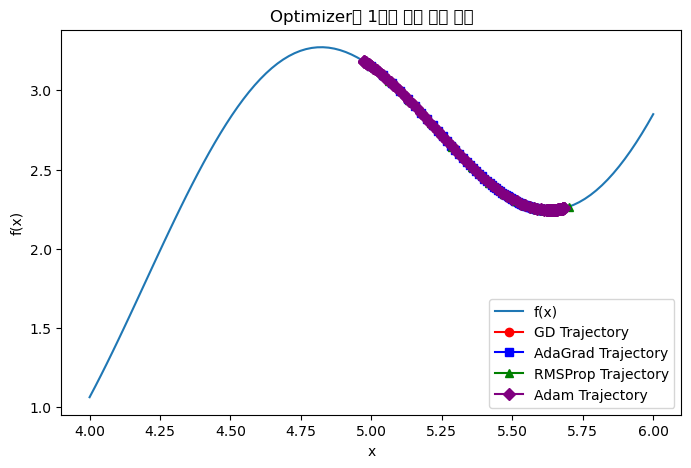

In [121]:
# 위에서 구현한 GD, AdaGrad, RMSProp, Adam의 궤적을 모두 시각화

# x 값 범위 생성
x_vals = np.linspace(4, 6, 100)
y_vals = f_fn(x_vals)

plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, label="f(x)")

# 각 optimizer별 초기값 설정
theta_gd = np.array([5.0])
theta_adagrad = np.array([5.0])
theta_rmsprop = np.array([5.0])
theta_adam = np.array([5.0])

# 하이퍼파라미터 및 변수 초기화
alpha = 0.05
n_iter = 100

G_adagrad = 1.0
eps = 1e-8

G_rmsprop = 1.0
rho = 0.9

m = 1.0
v = 1.0
beta1 = 0.9
beta2 = 0.999

# 각 optimizer별 trajectory 저장
traj_gd = [theta_gd[0]]
traj_adagrad = [theta_adagrad[0]]
traj_rmsprop = [theta_rmsprop[0]]
traj_adam = [theta_adam[0]]

for i in range(n_iter):
    # Gradient 계산
    g_gd      = np.array(grad_fn(theta_gd[0]), dtype=float).flatten()
    g_adagrad = np.array(grad_fn(theta_adagrad[0]), dtype=float).flatten()
    g_rmsprop = np.array(grad_fn(theta_rmsprop[0]), dtype=float).flatten()
    g_adam    = np.array(grad_fn(theta_adam[0]), dtype=float).flatten()
    
    # 1. Vanilla Gradient Descent
    theta_gd = theta_gd - alpha * g_gd
    traj_gd.append(theta_gd[0])

    # 2. AdaGrad
    G_adagrad += g_adagrad[0]**2
    theta_adagrad = theta_adagrad - (alpha / (np.sqrt(G_adagrad) + eps)) * g_adagrad
    traj_adagrad.append(theta_adagrad[0])

    # 3. RMSProp
    G_rmsprop = rho * G_rmsprop + (1 - rho) * g_rmsprop[0]**2
    theta_rmsprop = theta_rmsprop - (alpha / (np.sqrt(G_rmsprop) + eps)) * g_rmsprop
    traj_rmsprop.append(theta_rmsprop[0])

    # 4. Adam
    m = beta1 * m + (1 - beta1) * g_adam[0]
    v = beta2 * v + (1 - beta2) * (g_adam[0]**2)
    m_hat = m / (1 - beta1**(i+1))
    v_hat = v / (1 - beta2**(i+1))
    theta_adam = theta_adam - alpha * m_hat / (np.sqrt(v_hat) + eps)
    traj_adam.append(theta_adam[0])

traj_gd = np.array(traj_gd)
traj_adagrad = np.array(traj_adagrad)
traj_rmsprop = np.array(traj_rmsprop)
traj_adam = np.array(traj_adam)

plt.plot(traj_gd, f_fn(traj_gd), marker="o", color="red", label="GD Trajectory")
plt.plot(traj_adagrad, f_fn(traj_adagrad), marker="s", color="blue", label="AdaGrad Trajectory")
plt.plot(traj_rmsprop, f_fn(traj_rmsprop), marker="^", color="green", label="RMSProp Trajectory")
plt.plot(traj_adam, f_fn(traj_adam), marker="D", color="purple", label="Adam Trajectory")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Optimizer별 1차원 함수 궤적 비교")
plt.legend()
plt.show()